# Mushrooms

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns

In [100]:
mushroom = pd.read_csv('mushrooms.csv')
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [101]:
mushroom.isnull().values.any()

False

Er zijn geen NaN waardes in de dataset

In [102]:
mushroom['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [103]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Wat opvalt is dat de feature 'veil-type' maar 1 unique heeft.

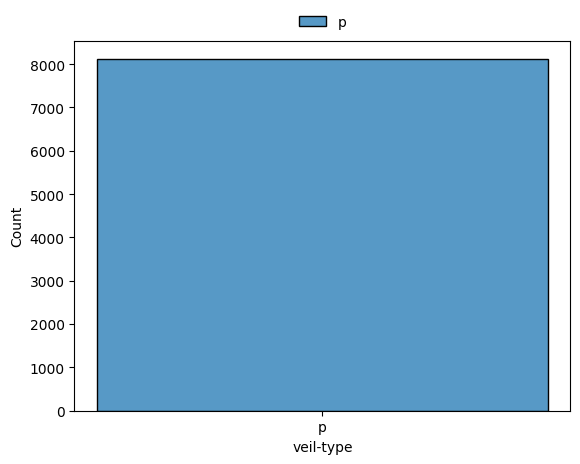

In [104]:
axs = sns.histplot(mushroom, x='veil-type', hue='veil-type', multiple='stack', bins=2)
sns.move_legend(axs, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

Een feature met maar 1 unieke waarde heeft geen nut, dus wordt deze eruit gehaald.

In [105]:
mushroom = mushroom.drop('veil-type', axis=1)

#### Invloed van leefgebied op toxiciteit
Hierbij is: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

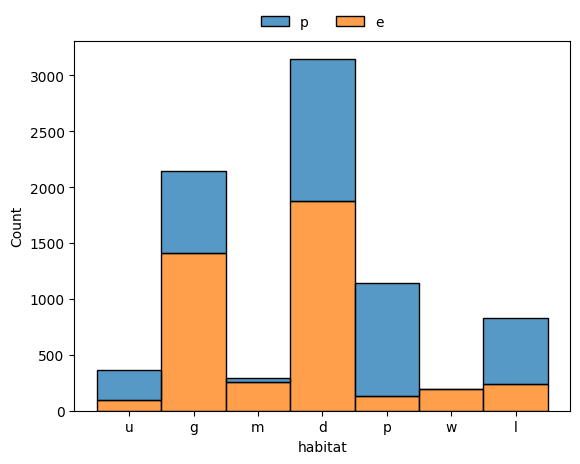

In [106]:
axs = sns.histplot(mushroom, x='habitat', hue='class', multiple='stack', bins=2)
sns.move_legend(axs, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

De feature 'habitat' zegt erg weinig over de toxiciteit van de paddenstoel. Alleen paddenstoelen die op 'waste' groeien zijn eetbaar, daarnaast zijn in 'meadows' groeiende paddenstoelen meestal eetbaar, maar niet altijd. Er zijn geen leefgebieden waarin alle paddenstoelen giftig zijn.

#### Invloed van populatie op toxiciteit
hierbij is: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

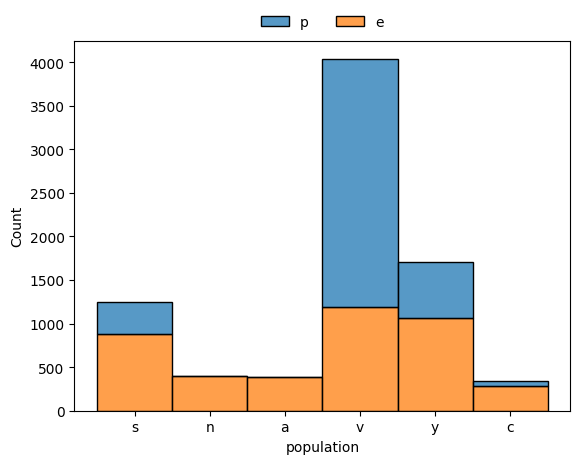

In [107]:
axs = sns.histplot(mushroom, x='population', hue='class', multiple='stack', bins=2)
sns.move_legend(axs, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

Van de drie groepen met de hoogste populatiedichtheid: abundant, clustered en numerous zijn numerous en abundant altijd eetbaar en is clustered bijna altijd eetbaar. Uit dit figuur kan als conclusie worden gehaald dat hogere populatiedichtheid een verhoogde kans op een eetbare paddenstoel met zich mee brengt. Er is geen groep waar alle paddenstoelen giftig in zijn, several is wel aanzienlijk veel vaker giftig als de andere groepen.

#### Invloed van geur op toxiciteit
hierbij is: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

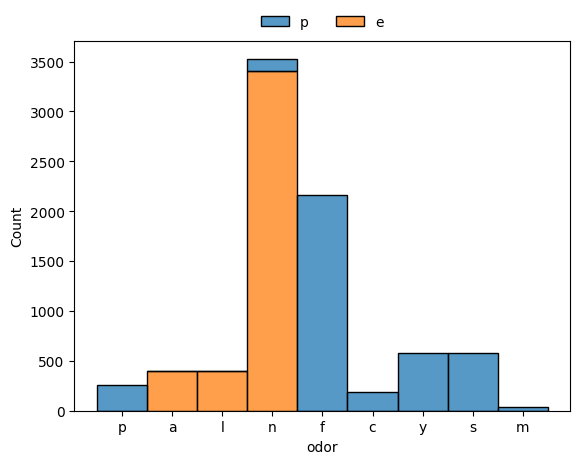

In [108]:
axs = sns.histplot(mushroom, x='odor', hue='class', multiple='stack', bins=2)
sns.move_legend(axs, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

Deze feature zegt duidelijk het meest. Alle over het algemeen als nare geuren beschauwde groepen, creosote, fishy, foul, musty, spicy en pungent zijn altijd giftig. De geuren almond en anise zijn altijd eetbaar. De groep zonder geur is meestal eetbaar, maar soms toch giftig. Dat almond (amandelen) altijd eetbaar zijn was enigszins verbazend, al is een amandel eetbaar, het wordt ook vaak geassocieerd met de geur van het gif cyanide.

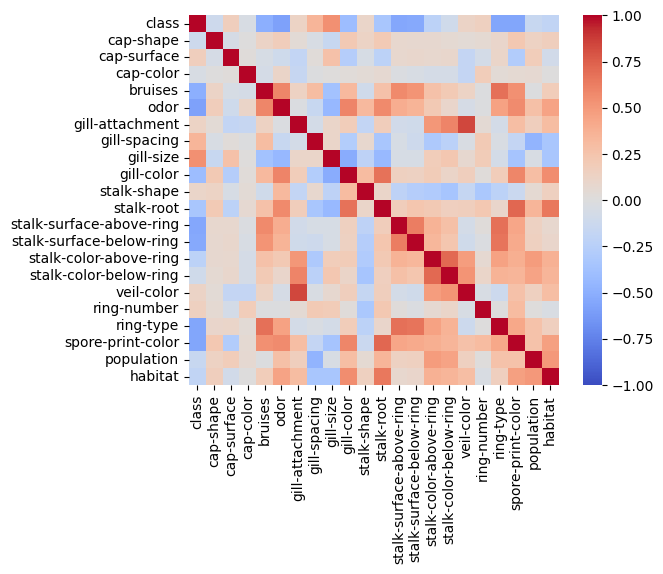

In [109]:
axs = sns.heatmap(mushroom.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1), cmap="coolwarm", vmin=-1.0, vmax=1.0, square=True)

***
## Machine Learning

Veel modellen kunnen niet met string/woorden overweg, dus worden deze allemaal naar cijfers omgezet.

In [110]:
from sklearn.preprocessing import LabelEncoder
X = mushroom.iloc[:, 1:].to_numpy() #all columns except the first one
y = mushroom.iloc[:, 0].to_numpy() #the first column (classes)

for column in range(X.shape[1]):
    X[:, column] = LabelEncoder().fit_transform(X[:, column]) #Make all values numeric


Dit zijn de gekozen modellen:

In [111]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

models = [
    DummyClassifier,
    DecisionTreeClassifier,
    LinearDiscriminantAnalysis,
    GaussianNB,
    KNeighborsClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    LogisticRegression
]


In [112]:
from sklearn.model_selection import cross_validate

metric_scores = {}
for model in models:
    scores = cross_validate(model(), X, y, cv=2, return_train_score=True)
    for key, val in scores.items():
        scores[key] = val.mean()
    metric_scores[f"{model.__name__}"] = scores

pd.DataFrame(metric_scores).T

C:\Users\Bram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Bram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Bram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (m

,fit_time,score_time,test_score,train_score
DummyClassifier,0.001501,0.003000,0.517971,0.517971
DecisionTreeClassifier,0.007998,0.007001,0.781388,1.000000
LinearDiscriminantAnalysis,0.016000,0.006500,0.771910,0.961841
GaussianNB,0.006001,0.005999,0.798991,0.898941
KNeighborsClassifier,0.005000,0.180278,0.800468,0.999508
RandomForestClassifier,0.145001,0.018001,0.787543,1.000000
AdaBoostClassifier,0.517298,0.173500,0.812900,1.000000
LogisticRegression,0.052142,0.006998,0.813023,0.989537


LogisticRegression scoort op test_score en train_score het best, maar geeft ook 3 warnings. AdaboostClassifier heeft daarna de beste test_score, maar heeft 1.0 als train_score, en overfit dus hoogstwaarschijnlijk. Daarna scoort KNeighborsClassifier het beste, 0.8 als test_score, en net onder 1.0 als train_score. KNeighborsClassifier lijkt het beste.

Omdat LogisticRegression het beste scoorde wordt er eerst gekekeken hoe deze presteert als de warnings worden opgelost. Er wordt hiervoor een scaler (sklearn StandardScaler) toegepast, deze schaalt features zodat ze een gemiddelde van 0 en een standaardafwijking van 1 hebben.

In [113]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)

X_scaled = scaler.transform(X)

In [114]:
from sklearn.model_selection import cross_validate

metric_scores = {}
for model in models:
    scores = cross_validate(model(), X_scaled, y, cv=2, return_train_score=True)
    for key, val in scores.items():
        scores[key] = val.mean()
    metric_scores[f"{model.__name__}"] = scores

pd.DataFrame(metric_scores).T

C:\Users\Bram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Bram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,fit_time,score_time,test_score,train_score
DummyClassifier,0.001499,0.003499,0.517971,0.517971
DecisionTreeClassifier,0.005499,0.004000,0.789266,1.000000
LinearDiscriminantAnalysis,0.013001,0.004000,0.754431,0.959010
GaussianNB,0.003001,0.003501,0.800345,0.884293
KNeighborsClassifier,0.002499,0.030867,0.794190,0.999754
RandomForestClassifier,0.148110,0.014998,0.784589,1.000000
AdaBoostClassifier,0.220001,0.021000,0.812900,1.000000
LogisticRegression,0.017500,0.004000,0.799114,0.992738


De waarschuwingen van LogisticRegression zijn nu weg, maar de score van veel models is lager geworden, inclusief LogisticRegression. AdaboostClassifier en natuurlijk DummyClassifier scoren hetzelfde, GaussianNB en DecisionTreeClassifier scoren wel beter. RandomForestClassifier scoort gemiddeld ongeveer hetzelfde.

Het scalen heeft niet veel zin gehad voor de score, die bleef ver het algemeen hetzelfde, of werd net iets slechter. Qua rekentijd was er wel een groot vershcil. In plaats van 3.1 seconden duurt het trainen en toepassen van de models nu maar 1.2 seconden.

## Train- en testdata maken

Op het tot nu toe beste model, KNeighborsClassifier wordt nu een toegewezen train en test data toegepast. Eerst wordt de data in train en test data gesplit, 25% van de data wordt test data, de rest train data.

In [132]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [133]:
y_test_series = pd.Series(y_test)

# Bereken en print het aantal exemplaren van elke klasse
class_counts = y_test_series.value_counts()
class_counts

e    1052
p     979
Name: count, dtype: int64

In [129]:
from sklearn.metrics import confusion_matrix

model = KNeighborsClassifier()

# Eerst wordt het model getrained
model.fit(X_train, y_train)
# Dan getest
y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n",cm)

Accuracy: 0.9980305268340719
Confusion Matrix:
 [[2099    5]
 [   3 1955]]


KNeighborsClassifier scoort op deze manier extreem goed, er zijn maar 5 fouten. Er is 4x door het model voorspeld dat een paddenstoel eetbaar is, terwijl deze dat niet was, en dit is ook 1x andersom gebeurt (verkeerd giftig voorspeld). Voor er naar het vermijden False Positives wordt gekeken wordt er eerst nog een ander model getest, deze kan potentieel beter presteren. Ookal leek AdaBoostClassifier last te hebben van overfitten (1.0 op train_score), wordt deze toch gebruikt omdat de test_score wel erg goed was:

In [130]:
model = AdaBoostClassifier()

# Eerst wordt het model getrained
model.fit(X_train, y_train)
# Dan getest
y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n",cm)

C:\Users\Bram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 1.0
Confusion Matrix:
 [[2104    0]
 [   0 1958]]


AdaBoostClassifier scoort 1.0, 100%. Om te kijken of dit niet toeval is wordt deze opnieuw gerunt met een grotere testdataset (test_size) en een andere random state:

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=12, stratify=y)

In [145]:
model = AdaBoostClassifier()

# Eerst wordt het model getrained
model.fit(X_train, y_train)
# Dan getest
y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n",cm)

C:\Users\Bram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 1.0
Confusion Matrix:
 [[3156    0]
 [   0 2937]]


Zelfs met een test_size van 75%, en dus een train_size van maar 25% van de data scoort AdaBoostClassifier 100%.

AdaBoostClassifier is extreem goed in het voorspellen van deze dataset. Meer toevoegingen lijken niet nodig.